In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('bmh')

In [3]:
data = pd.read_csv("daiktai_cleaned.csv", sep="ʃ", on_bad_lines='skip')

C:\Users\zabit\AppData\Local\Temp\ipykernel_16156\2905097904.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("daiktai_cleaned.csv", sep="ʃ", on_bad_lines='skip')


In [4]:
data.head()

,item_title,item_description,item_country,Sub_Category_1,Sub_Category_2
0,Šilko užvalkalai pagalvei,"Nauji, šilko užvalkalai sandratiniai pagalvei ...",Liettua,Namams,Tekstilė
1,Avalynė,"41 dydis Avalynė dėvėta, išvalius, nešiosote...",Liettua,Moterims,Avalynė
2,Gėlių stovai,"Gražūs, juodi su aukso spalvos kojomis, metali...",Liettua,Namams,Interjero akcentai
3,Kreminė bliuskyte,Nauja,Liettua,Moterims,Drabužiai
4,Tommy Hilfiger šlepetės,Naujos,Liettua,Moterims,Avalynė


In [5]:
print(data['item_description'].isna().sum())

0


In [6]:
print(data['item_title'].isna().sum())

0


In [7]:
print(data['Sub_Category_1'].value_counts()) 

Sub_Category_1
Moterims         1456791
Vaikams           987717
Vyrams            171332
Pramogos          110354
Namams             31579
Kids               10898
Women               6698
Gyvūnams            4124
Men                  406
Entertainment        297
Home                  65
Pet care              37
Name: count, dtype: int64


In [8]:
mapping = {
    "Kids": "Vaikams",
    "Women": "Moterims",
    "Men": "Vyrams",
    "Entertainment": "Pramogos",
    "Home": "Namams",
    "Pet care": "Gyvūnams"
}


data['Sub_Category_1'] = data['Sub_Category_1'].replace(mapping)
print(data['Sub_Category_1'].value_counts())

Sub_Category_1
Moterims    1463489
Vaikams      998615
Vyrams       171738
Pramogos     110651
Namams        31644
Gyvūnams       4161
Name: count, dtype: int64


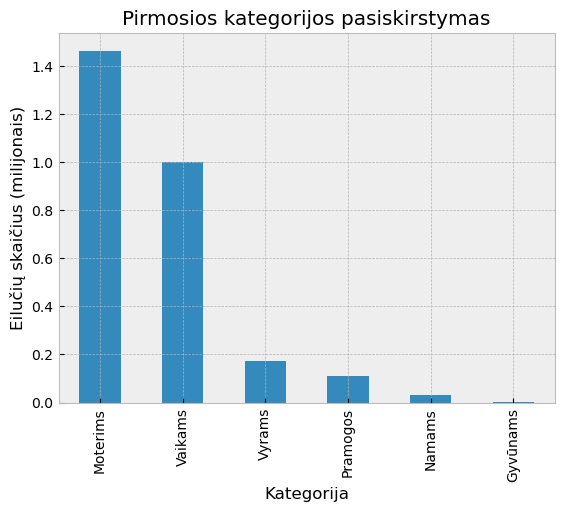

In [9]:
import matplotlib.ticker as mticker

counts = data['Sub_Category_1'].value_counts()

counts.plot(kind='bar')

plt.title('Pirmosios kategorijos pasiskirstymas')
plt.xlabel('Kategorija')
plt.ylabel('Eilučių skaičius (milijonais)')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}'))
plt.show()

In [10]:
mapping_sub2 = {
    "Clothing": "Drabužiai",
    "Girls clothing": "Apranga mergaitėms",
    "Boys clothing": "Apranga berniukams",
    "Shoes": "Avalynė",
    "Accessories": "Aksesuarai",
    "Books": "Knygos",
    "Toys & games": "Žaislai",
    "Bags": "Rankinės",
    "Baby care": "Kūdikių ir vaikų priežiūra",
    "Beauty": "Kosmetika",
    "Games & puzzles": "Žaidimai ir galvosūkiai",
    "Other kids' items": "Visa kita",
    "Home accessories": "Interjero akcentai",
    "Music & video": "Muzika ir vaizdo turinys",
    "Tableware": "Stalo serviravimas",
    "Textiles": "Tekstilė",
    "Video games & consoles": "Vaizdo žaidimai ir konsolės",
    "School supplies": "Mokyklos reikmenys",
    "Kid & baby furniture": "Baldai vaikams",
    "Strollers": "Vežimukai",
    "Celebrations & holidays": "Šventės",
    "Ride-on toys": "Judėjimo priemonės",
    "Dogs": "Šunys",
    "Chairs": "Kėdutės",
    "Cats": "Katės",
    "Fish": "Žuvys",
    "Grooming": "Kosmetika"
}

data['Sub_Category_2'] = data['Sub_Category_2'].replace(mapping_sub2)
print(data['Sub_Category_2'].value_counts())

Sub_Category_2
Drabužiai                      1249189
Apranga mergaitėms              523092
Apranga berniukams              353926
Avalynė                         161561
Aksesuarai                      156097
Knygos                           77634
Žaislai                          66826
Rankinės                         49626
Kūdikių ir vaikų priežiūra       23163
Kosmetika                        18754
Žaidimai ir galvosūkiai          16530
Visa kita                        12897
Interjero akcentai               11486
Muzika ir vaizdo turinys         10700
Stalo serviravimas                9774
Tekstilė                          6523
Vaizdo žaidimai ir konsolės       5787
Mokyklos reikmenys                5009
Baldai vaikams                    4400
Vežimukai                         4377
Šventės                           3861
Judėjimo priemonės                2842
Šunys                             2704
Kėdutės                           1911
Katės                              753
Smulkūs gy

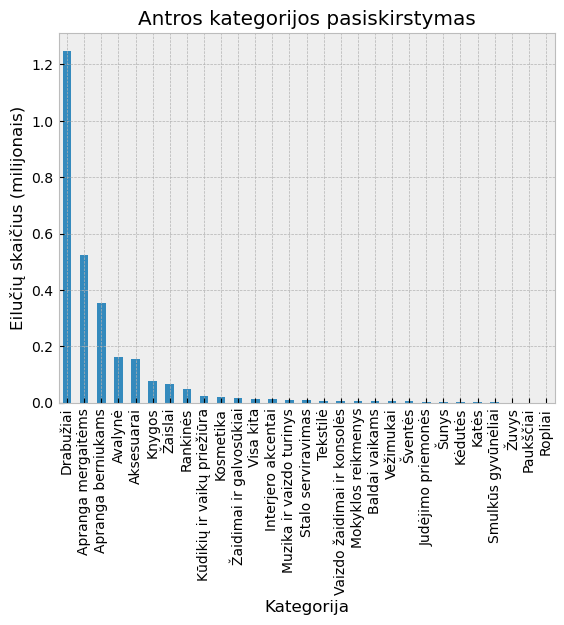

In [11]:
import matplotlib.ticker as mticker

counts = data['Sub_Category_2'].value_counts()

counts.plot(kind='bar')

plt.title('Antros kategorijos pasiskirstymas')
plt.xlabel('Kategorija')
plt.ylabel('Eilučių skaičius (milijonais)')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}'))
plt.show()

In [12]:
print(data['Sub_Category_1'].nunique())

6


In [13]:
print(data['Sub_Category_2'].nunique())

29


In [14]:
data['item_description'] = data['item_title'].astype(str) + " " + data['item_description'].astype(str)

print(data['item_description'].head(5))

0    Šilko užvalkalai pagalvei Nauji, šilko užvalka...
1    Avalynė 41 dydis   Avalynė dėvėta, išvalius, n...
2    Gėlių stovai Gražūs, juodi su aukso spalvos ko...
3                              Kreminė bliuskyte Nauja
4                       Tommy Hilfiger šlepetės Naujos
Name: item_description, dtype: object


In [15]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='auto', target='lt')

country_values = data['item_country'].value_counts()

In [16]:
print(data['item_country'].unique())

['Liettua' 'Lietuva' 'Lituania' 'Litwa' 'Prancūzija' 'France' 'Belgique'
 'Lithuania' 'Ispanija' 'França' 'Francia' 'Frankreich' 'Lituanie'
 'Lituânia' 'Espagne' 'Netherlands' 'Frankrijk' 'Litva' 'España' 'Belgija'
 'Pays-Bas' 'België' 'Nederland' 'Spagna' 'Spain' 'Litauen' 'Niederlande'
 'Belgium' 'Paesi Bassi' 'Spanje' 'Nyderlandai' 'Países Baixos' 'Espanha'
 'Belgio' 'United Kingdom' 'Países Bajos' 'Litvánia' 'Španělsko'
 'Liuksemburgas' 'Litouwen' 'Bélgica' 'Italija' 'Deutschland' 'Luxembourg'
 'Holandia' 'Spanien' 'Germany' 'United States' 'Hollandia' 'Espanja'
 'Portugal' 'Suomi' 'Italia' 'Španielsko' 'Österreich' 'Vokietija' 'Italy'
 'Jungtinė Karalystė' 'Polska' 'Francúzsko' 'Lussemburgo' 'Autriche'
 'Belgien' 'Luxemburgo' 'Suomija' 'Italie' 'Frankrike' 'Česká republika'
 'Austrija' 'Austria' 'Lenkija' 'Vengrija' 'Portugalija' 'Magyarország'
 'Hungary' 'Węgry' 'Czechy' 'Čekija' 'Polsko' 'Szwecja' 'Italien'
 'Slovensko' 'Italië' 'Polonia' 'Švedija' 'Slovakija' 'Itália'
 'Royaume

In [17]:
country_values = country_values.reset_index()
country_values['item_country'] = country_values['item_country'].apply(lambda x: translator.translate(str(x)))

In [18]:
print(country_values['item_country'].unique())

['Lietuva' 'Deutschland' 'Prancūzija' 'Vokietija' 'Ispanija'
 'Jungtinė Karalystė' 'Nyderlandai' 'Italija' 'Belgija' 'Lenkija'
 'Portugalija' 'Vengrija' 'Austrija' 'Čekijos Respublika' 'Germanija'
 'Liuksemburgas' 'lenkų' 'Slovakija' 'Čekija' 'Francie' 'Švedija'
 'vokiečių' 'čekų' 'Jungtinės Valstijos' 'Didžioji Britanija' 'JAV'
 'Suomija' 'suomių']


In [19]:
country_mapping = {
    'Deutschland': 'Vokietija',
    'The Netherlands': 'Nyderlandai',
    'Čekijos Respublika': 'Čekija',
    'lenkų': 'Lenkija',
    'Francie': 'Prancūzija',
    'Jungtinės Valstijos': 'JAV',
    'suomių': 'Suomija',
    'Germanija': 'Vokietija',
    'vokiškai': 'Vokietija',
    'vokiečių': 'Vokietija',
    'čekų': 'Čekija',
    'Didžioji Britanija': 'Jungtinė Karalystė'
}

country_values['item_country'] = country_values['item_country'].replace(country_mapping)

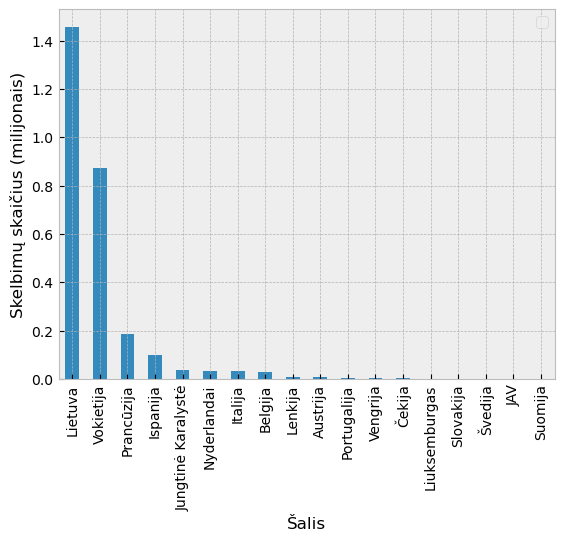

In [20]:
country_values_series = country_values.groupby('item_country').sum() / 1e6
country_values_series\
    .sort_values('count', ascending=False)\
    .plot.bar()

plt.xlabel('Šalis')
plt.ylabel('Skelbimų skaičius (milijonais)')
plt.legend([])

In [21]:
data.to_csv("daiktai_translated.csv", sep="ʃ", index=False, encoding="utf-8")

In [60]:
import nltk

def token_count(text):
    tokens = nltk.word_tokenize(str(text)) 
    return len(tokens)

data['description_token_kiekis'] = data['item_description'].apply(token_count)

In [51]:
print(data[['item_description', 'description_token_kiekis']].head(10))

                                    item_description  description_token_kiekis
0  Šilko užvalkalai pagalvei Nauji, šilko užvalka...                        13
1  Avalynė 41 dydis   Avalynė dėvėta, išvalius, n...                        11
2  Gėlių stovai Gražūs, juodi su aukso spalvos ko...                        30
3                            Kreminė bliuskyte Nauja                         3
4                     Tommy Hilfiger šlepetės Naujos                         4
5  Sidabrinis korsetas Toks nuo S iki L  nugaroje...                        17
6  Žalias megztinukas Žalios spalvos, fainas, šve...                        10
7                                INVLI akiniai Nauji                         3
8   Koralinės spalvos suknutė Graži, vasarai suknutė                         7
9                   Perlo spalvos maudymkė Naujas XL                         5


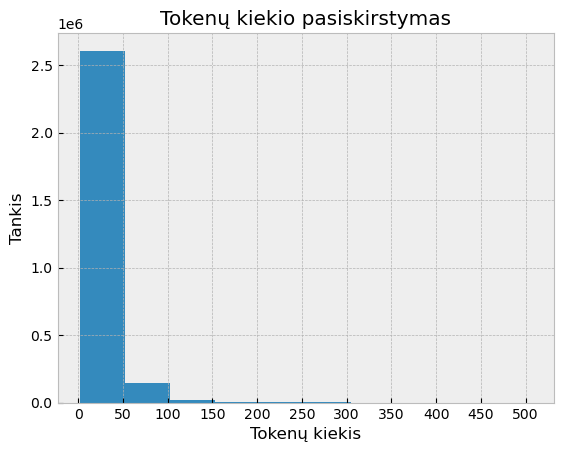

In [ ]:
plt.hist(data['description_token_kiekis'])

plt.title('Tokenų kiekio pasiskirstymas')
plt.ylabel('Tankis')
plt.xlabel('Tokenų kiekis')
plt.xticks(np.arange(0, data['description_token_kiekis'].max() + 1, 50))

plt.show()

In [53]:
import re

def token_count_beskyr(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    tokens = nltk.word_tokenize(text)
    return len(tokens)

data['description_token_kiekis_beskyr'] = data['item_description'].apply(token_count_beskyr)

In [54]:
print(data[['item_description', 'description_token_kiekis_beskyr']].head(10))

                                    item_description  \
0  Šilko užvalkalai pagalvei Nauji, šilko užvalka...   
1  Avalynė 41 dydis   Avalynė dėvėta, išvalius, n...   
2  Gėlių stovai Gražūs, juodi su aukso spalvos ko...   
3                            Kreminė bliuskyte Nauja   
4                     Tommy Hilfiger šlepetės Naujos   
5  Sidabrinis korsetas Toks nuo S iki L  nugaroje...   
6  Žalias megztinukas Žalios spalvos, fainas, šve...   
7                                INVLI akiniai Nauji   
8   Koralinės spalvos suknutė Graži, vasarai suknutė   
9                   Perlo spalvos maudymkė Naujas XL   

   description_token_kiekis_beskyr  
0                               12  
1                                9  
2                               25  
3                                3  
4                                4  
5                               16  
6                                7  
7                                3  
8                                6  
9            

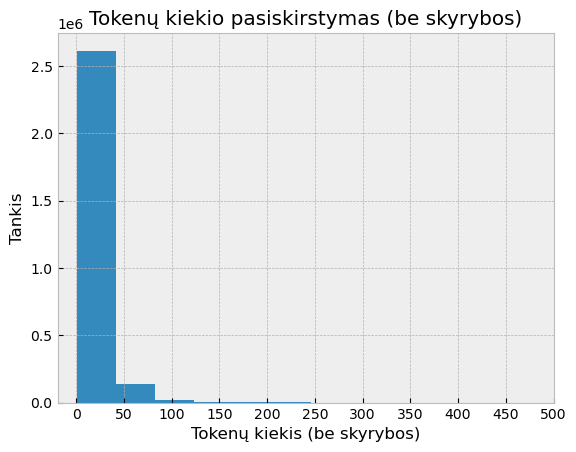

In [55]:
plt.hist(data['description_token_kiekis_beskyr'])

plt.title('Tokenų kiekio pasiskirstymas (be skyrybos)')
plt.ylabel('Tankis')
plt.xlabel('Tokenų kiekis (be skyrybos)')
plt.xticks(np.arange(0, data['description_token_kiekis'].max() + 1, 50))
plt.show()

In [56]:
import numpy as np

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

counts, bin_edges = np.histogram(data['description_token_kiekis'], bins=bins)

for i in range(len(counts)):
    print(f"Intervalas {bin_edges[i]} - {bin_edges[i+1]}: {counts[i]} reikšmių")

Intervalas 0 - 50: 2585148 reikšmių
Intervalas 50 - 100: 165246 reikšmių
Intervalas 100 - 150: 21374 reikšmių
Intervalas 150 - 200: 4857 reikšmių
Intervalas 200 - 250: 1983 reikšmių
Intervalas 250 - 300: 826 reikšmių
Intervalas 300 - 350: 401 reikšmių
Intervalas 350 - 400: 133 reikšmių
Intervalas 400 - 450: 199 reikšmių
Intervalas 450 - 500: 129 reikšmių


In [57]:
import numpy as np

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

counts, bin_edges = np.histogram(data['description_token_kiekis_beskyr'], bins=bins)

for i in range(len(counts)):
    print(f"Intervalas {bin_edges[i]} - {bin_edges[i+1]}: {counts[i]} reikšmių")

Intervalas 0 - 50: 2682423 reikšmių
Intervalas 50 - 100: 83985 reikšmių
Intervalas 100 - 150: 9969 reikšmių
Intervalas 150 - 200: 2618 reikšmių
Intervalas 200 - 250: 1025 reikšmių
Intervalas 250 - 300: 245 reikšmių
Intervalas 300 - 350: 32 reikšmių
Intervalas 350 - 400: 0 reikšmių
Intervalas 400 - 450: 1 reikšmių
Intervalas 450 - 500: 0 reikšmių


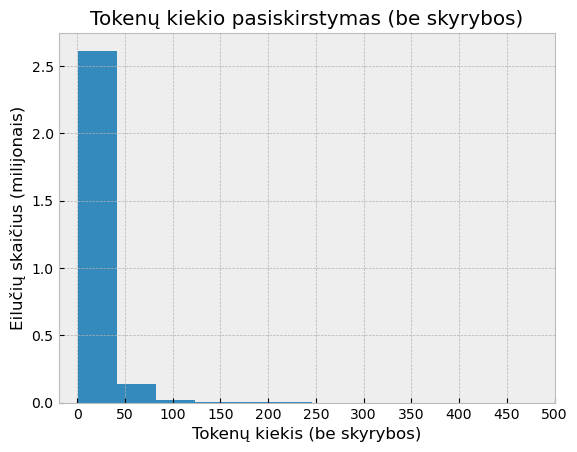

In [58]:
plt.hist(data['description_token_kiekis_beskyr'])

plt.title('Tokenų kiekio pasiskirstymas (be skyrybos)')
plt.ylabel('Eilučių skaičius (milijonais)')
plt.xlabel('Tokenų kiekis (be skyrybos)')
plt.xticks(np.arange(0, data['description_token_kiekis'].max() + 1, 50))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}'))
plt.show()


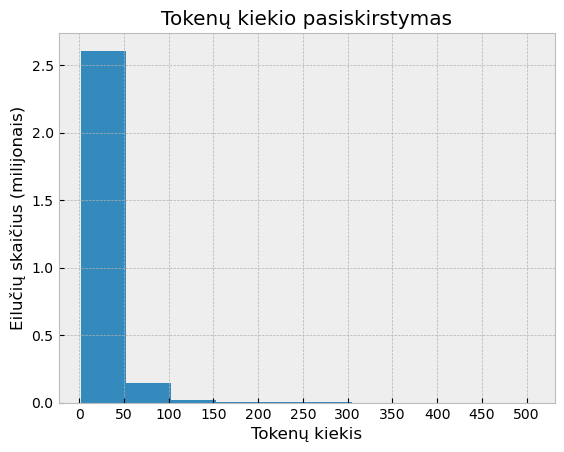

In [59]:
plt.hist(data['description_token_kiekis'])

plt.title('Tokenų kiekio pasiskirstymas')
plt.ylabel('Eilučių skaičius (milijonais)')
plt.xlabel('Tokenų kiekis')
plt.xticks(np.arange(0, data['description_token_kiekis'].max() + 1, 50))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}'))
plt.show()